   ---------------------------------------- 0.0/205.6 kB ? eta -:--:--
   ------- ------------------------------- 41.0/205.6 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 205.6/205.6 kB 2.5 MB/s eta 0:00:00


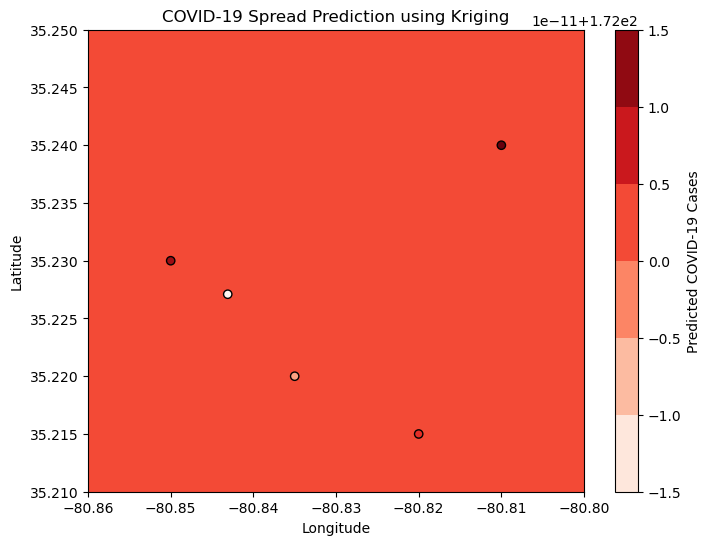

In [2]:
!pip install pykrige

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pykrige.ok import OrdinaryKriging
from shapely.geometry import Point

# Step 1: Simulated COVID-19 case data (Test Site Locations with Cases)
covid_data = pd.DataFrame({
    'latitude': [35.2271, 35.2300, 35.2200, 35.2150, 35.2400],
    'longitude': [-80.8431, -80.8500, -80.8350, -80.8200, -80.8100],
    'cases': [120, 200, 150, 180, 210]  # Cases reported at test sites
})

# Step 2: Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(covid_data['longitude'], covid_data['latitude'])]
covid_gdf = gpd.GeoDataFrame(covid_data, geometry=geometry, crs='EPSG:4326')

# Step 3: Apply Kriging Interpolation
ok = OrdinaryKriging(
    covid_data['longitude'], covid_data['latitude'], covid_data['cases'],
    variogram_model='linear', verbose=False, enable_plotting=False
)

# Step 4: Create Grid for Predictions
grid_lon = np.linspace(-80.86, -80.80, 50)
grid_lat = np.linspace(35.21, 35.25, 50)
X, Y = np.meshgrid(grid_lon, grid_lat)
Z, _ = ok.execute('grid', grid_lon, grid_lat)

# Step 5: Plot Heatmap
plt.figure(figsize=(8,6))
plt.contourf(X, Y, Z, cmap='Reds')
plt.colorbar(label='Predicted COVID-19 Cases')
plt.scatter(covid_data['longitude'], covid_data['latitude'], c=covid_data['cases'], cmap='Reds', edgecolors='black')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('COVID-19 Spread Prediction using Kriging')
plt.show()
